In [ ]:
# Carga de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

Carga de Datos

In [ ]:
data = pd.read_csv('olimpicos.csv')
data

,Atleta,Edad,Altura_cm,Peso_kg,Deporte,Entrenamientos_Semanales,Medallas_Totales,Pais
0,Usain Bolt,34,195,94,Atletismo,6,8,Jamaica
1,Simone Biles,26,142,47,Gimnasia,10,7,EE.UU.
2,Michael Phelps,35,193,88,Natación,9,23,EE.UU.
3,Katie Ledecky,27,183,70,Natación,8,10,EE.UU.
4,Nadia Comaneci,45,160,50,Gimnasia,7,5,Rumania
5,Mo Farah,38,175,65,Atletismo,6,4,Reino Unido
6,Yelena Isinbayeva,40,174,65,Salto con pértiga,5,3,Rusia


In [ ]:
# carga las primeras 5 filas
data.head()

,Atleta,Edad,Altura_cm,Peso_kg,Deporte,Entrenamientos_Semanales,Medallas_Totales,Pais
0,Usain Bolt,34,195,94,Atletismo,6,8,Jamaica
1,Simone Biles,26,142,47,Gimnasia,10,7,EE.UU.
2,Michael Phelps,35,193,88,Natación,9,23,EE.UU.
3,Katie Ledecky,27,183,70,Natación,8,10,EE.UU.
4,Nadia Comaneci,45,160,50,Gimnasia,7,5,Rumania


In [ ]:
# se observan 7 registros (filas) y 8 columnas (variables)
# no se observan elementos NaN
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Atleta                    7 non-null      object
 1   Edad                      7 non-null      int64 
 2   Altura_cm                 7 non-null      int64 
 3   Peso_kg                   7 non-null      int64 
 4   Deporte                   7 non-null      object
 5   Entrenamientos_Semanales  7 non-null      int64 
 6   Medallas_Totales          7 non-null      int64 
 7   Pais                      7 non-null      object
dtypes: int64(5), object(3)
memory usage: 580.0+ bytes


In [ ]:
# Calcula estadísticas descriptivas con .describe().
data.describe()

,Edad,Altura_cm,Peso_kg,Entrenamientos_Semanales,Medallas_Totales
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,35.000000,174.571429,68.428571,7.285714,8.571429
std,6.831301,18.715921,17.614929,1.799471,6.803361
min,26.000000,142.000000,47.000000,5.000000,3.000000
25%,30.500000,167.000000,57.500000,6.000000,4.500000
50%,35.000000,175.000000,65.000000,7.000000,7.000000
75%,39.000000,188.000000,79.000000,8.500000,9.000000
max,45.000000,195.000000,94.000000,10.000000,23.000000


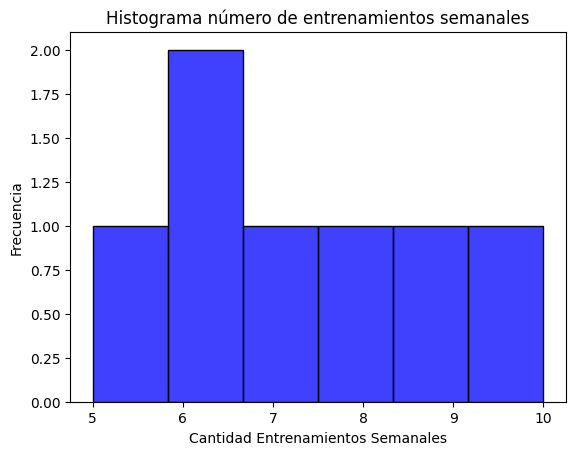

In [ ]:
# Genera un histograma del número de entrenamientos semanales.
#
sns.histplot(data['Entrenamientos_Semanales'], kde=False, color='blue', bins=6)
plt.title('Histograma número de entrenamientos semanales')
plt.xlabel('Cantidad Entrenamientos Semanales')
plt.ylabel('Frecuencia')
plt.show()

2. Estadística Descriptiva

In [ ]:
# Determina el tipo de variable de cada columna.
# Atleta contiene el nombre del deportista es categorica nominal
# Edad contiene la edad en años es numerica y discreta
# Altura_cm contiene la estatura en cms del deportista es numerica y discreta
# Peso_kg contiene el peso en kilogramos de los deportista es numerica y discreta
# Deporte es la disciplina deportiva practicada por el deportista es categorica nominal
# Entrenamientos_semanales indica el numero de dias de entrenamiento en la semana es numerica y discreta
# Medallas_Totales contiene el numero de galardones recibidos por el deportista es numerica y discreta
# Pais es el lugar de procedencia del deportista es categorcia y nominal

data.dtypes

,0
Atleta,object
Edad,int64
Altura_cm,int64
Peso_kg,int64
Deporte,object
Entrenamientos_Semanales,int64
Medallas_Totales,int64
Pais,object


In [ ]:
# Calcula la media, mediana y moda de la cantidad de medallas obtenidas.
media_medallas = data['Medallas_Totales'].mean()
mediana_medallas = data['Medallas_Totales'].median()

print(f"La Media de las medallas es {media_medallas:.2f}")
print(f"La Mediana de las medalles es {mediana_medallas}")


La Media de las medallas es 8.57
La Mediana de las medalles es 7.0


In [ ]:
# moda de la cantidad de medalla
moda_medallas = stats.mode(data['Medallas_Totales'])
print('Moda:', moda_medallas[0]," y frecuencia de :", moda_medallas[1])
# aqui no hay moda,  pues mode solo entrega el primer valor de "medallas_totales" y frecuencia 1, es decir, todos los valores tiene frecuencia 1
# esto es posible confirmarlo con value_counts
data['Medallas_Totales'].value_counts()

Moda: 3  y frecuencia de : 1


,count
Medallas_Totales,
8,1
7,1
23,1
10,1
5,1
4,1
3,1


In [ ]:
# Calcula la desviación estándar de la altura de los atletas.
desviacion_estandar_altura = data['Altura_cm'].std()
print(f"Desviación estándar: {desviacion_estandar_altura:.2f} cms")

Desviación estándar: 18.72 cms


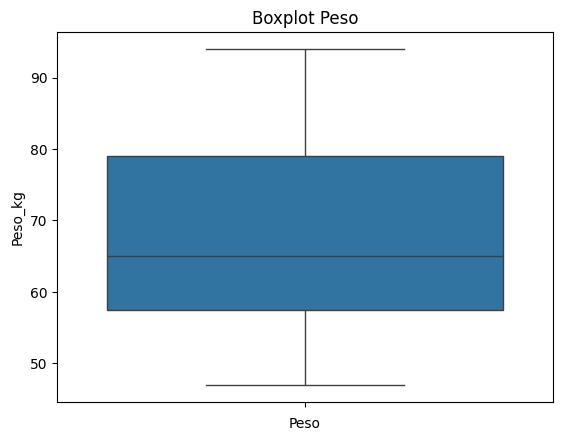

In [ ]:
# Identifica valores atípicos en la columna de peso utilizando un boxplot
sns.boxplot(data['Peso_kg'])
plt.title('Boxplot Peso')
plt.xlabel('Peso')
plt.show()
# no se obervan valores atipicos en esta variable.


3. Análisis de Correlación

In [ ]:
# Calcula la correlación de Pearson entre entrenamientos semanales y medallas totales.
correlacion_entrenamientos_medallas = data['Entrenamientos_Semanales'].corr(data['Medallas_Totales'])
print('Correlación Pearson:', correlacion_entrenamientos_medallas)

Correlación Pearson: 0.5698362008613984


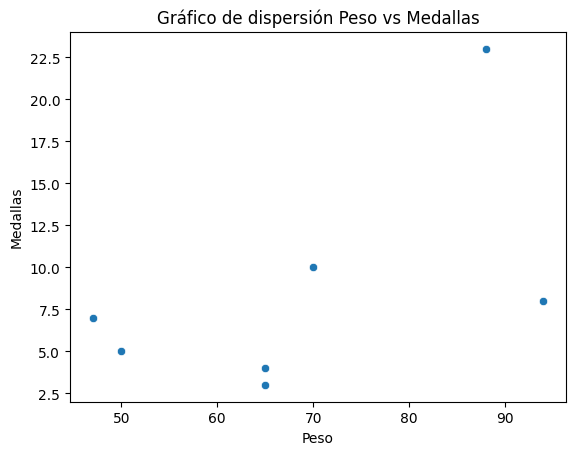

In [ ]:
# Crea un gráfico de dispersión (scatterplot) entre peso y medallas totales con Seaborn.
sns.scatterplot(data=data, x='Peso_kg', y='Medallas_Totales')
plt.title('Gráfico de dispersión Peso vs Medallas')
plt.xlabel('Peso')
plt.ylabel('Medallas')
plt.show()

In [ ]:
# Explica si existe correlación entre estas variables.
# correlacion entre peso y medallas
correlacion_peso_medallas = data['Peso_kg'].corr(data['Medallas_Totales'])
print('Correlación Pearson:', correlacion_peso_medallas)
# la correlación de 0,56, se podria decir,qu indica una correlación positiva moderada entre dos variables,
# lo que significa que a medida que una variable aumenta, la otra tiende a aumentar, pero la relación no es muy fuerte
# es importante señalar que no hay causalidad , en otras palabras no es posible afirmar que un aumento de peso
# cause la obtención de medallas

Correlación Pearson: 0.5622542793734885


4. Regresión Lineal

In [ ]:
# Implementa un modelo de regresión lineal para predecir el número de medallas
# obtenidas en función del número de entrenamientos semanales.
modelo = LinearRegression()
X = data[['Entrenamientos_Semanales']]
y = data['Medallas_Totales']
modelo.fit(X, y)

LinearRegression()

In [ ]:
# Obtén los coeficientes de regresión e interpreta el resultado.
print('Coeficientes de regresión:')

# obtener coeficientes
beta_0 = modelo.intercept_
beta_1 = modelo.coef_[0]

print('Coeficiente beta_0 :', beta_0)
print('Coeficiente beta_1 :', beta_1)

# entonces la regresion queda de esta forma:
# Medallas_Totales_pred = beta_0 + beta_1 * Entrenamientos_Semanales

Coeficientes de regresión:
Coeficiente beta_0 : -7.125
Coeficiente beta_1 : 2.1544117647058822


In [ ]:
# hacer predicciones
Medallas_Totales_pred = modelo.predict(X)

In [ ]:
# Calcula el R² para medir el ajuste del modelo.
r2 = r2_score(y, Medallas_Totales_pred)
print("Coeficiente de Determinación (R²):", r2)

Coeficiente de Determinación (R²): 0.32471329581215214


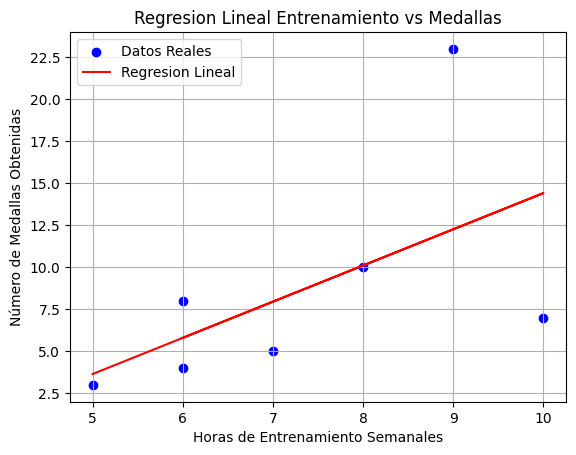

In [ ]:
# visualizacion de la regresion
plt.scatter(X, y , color ='blue', label='Datos Reales')
plt.plot(X, Medallas_Totales_pred, color='red', label='Regresion Lineal')
plt.xlabel('Horas de Entrenamiento Semanales')
plt.ylabel('Número de Medallas Obtenidas')
plt.title('Regresion Lineal Entrenamiento vs Medallas')
plt.legend()
plt.grid()
plt.show()

Por lo tanto, un R² de 0,34 indica que solamente , un 34% de la proporción de la varianza de la variable dependiente "Medallas_Totales" puede ser explicada por el modelo de regresión.



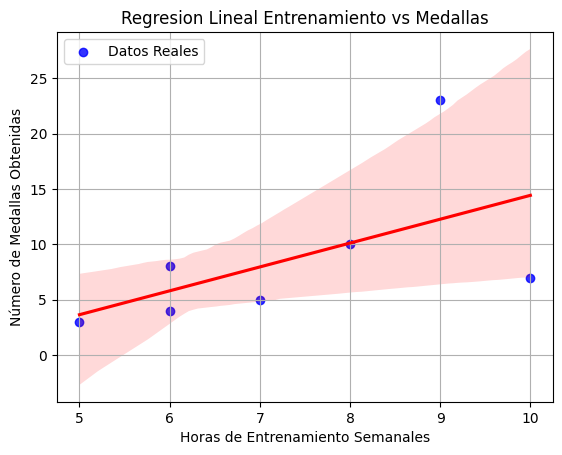

In [ ]:
# Usa Seaborn (regplot) para graficar la regresión lineal.
sns.regplot(x=X, y=y, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'},label='Datos Reales')
plt.xlabel('Horas de Entrenamiento Semanales')
plt.ylabel('Número de Medallas Obtenidas')
plt.title('Regresion Lineal Entrenamiento vs Medallas')
plt.legend()
plt.grid()
plt.show()

5. Visualización de Datos con Seaborn y Matplotlib


                              Edad  Altura_cm   Peso_kg  \
Edad                      1.000000   0.075607 -0.078948   
Altura_cm                 0.075607   1.000000  0.941968   
Peso_kg                  -0.078948   0.941968  1.000000   
Entrenamientos_Semanales -0.637233  -0.357015 -0.204312   
Medallas_Totales         -0.265371   0.485236  0.562254   

                          Entrenamientos_Semanales  Medallas_Totales  
Edad                                     -0.637233         -0.265371  
Altura_cm                                -0.357015          0.485236  
Peso_kg                                  -0.204312          0.562254  
Entrenamientos_Semanales                  1.000000          0.569836  
Medallas_Totales                          0.569836          1.000000  


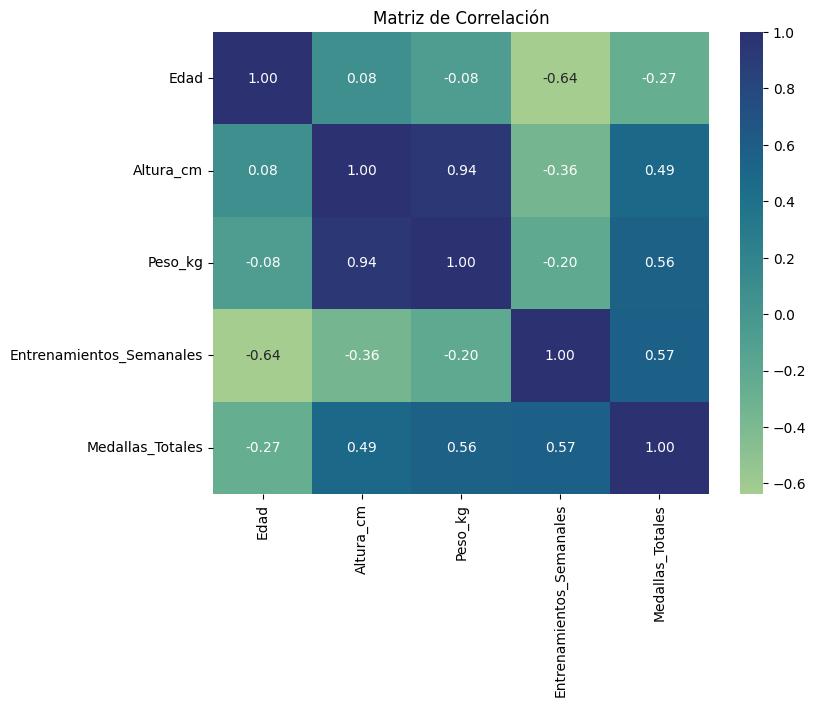

In [ ]:
# sacar las columnas atleta , deporte y pais
df1 = data.drop(['Atleta', 'Deporte','Pais'], axis=1)

# correlacion
print(df1.corr())

# visualizacion de un mapa de calor para correlaciones
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(), annot=True, cmap='crest', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

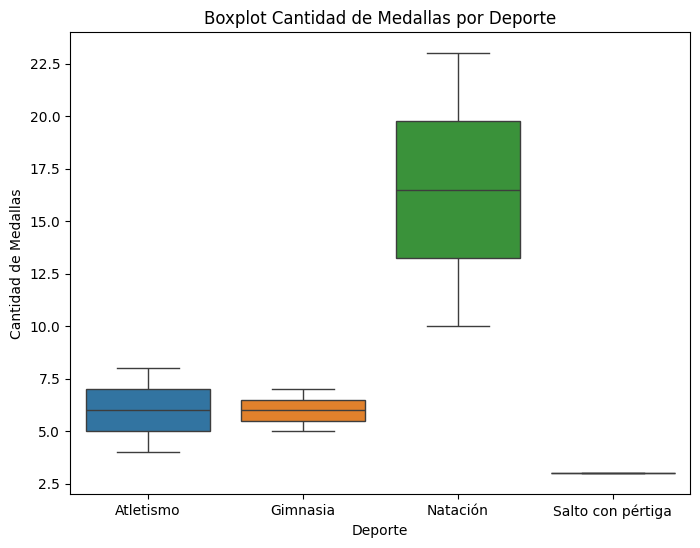

In [ ]:
# Crea un boxplot de la cantidad de medallas por disciplina deportiva.
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='Deporte', y='Medallas_Totales', hue='Deporte')
plt.title('Boxplot Cantidad de Medallas por Deporte')
#plt.legend()

plt.xlabel('Deporte')
plt.ylabel('Cantidad de Medallas')
plt.show()

In [ ]:
# cantidad de medallas por disciplina deportiva
medallas_por_deporte = data.groupby('Deporte')['Medallas_Totales'].sum()
print(medallas_por_deporte)

Deporte
Atletismo            12
Gimnasia             12
Natación             33
Salto con pértiga     3
Name: Medallas_Totales, dtype: int64
